<a href="https://colab.research.google.com/github/HiepHuynh09/my-sns-python-code/blob/main/Ph%C3%A2n_t%C3%ADch_m%E1%BA%A1ng_k%E1%BB%B9_n%C4%83ng_LinkedIn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset_Accountant_LinkedIn_2.xlsx to Dataset_Accountant_LinkedIn_2.xlsx


In [ ]:
# Cài đặt thư viện Louvain (chạy dòng này một lần)
!pip install python-louvain
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import matplotlib.patches as mpatches
import community.community_louvain as community_louvain

In [ ]:
# Đọc dữ liệu từ file vừa upload
df = pd.read_excel("Dataset_Accountant_LinkedIn_2.xlsx")
# Xử lý kỹ năng
df['Job_skill'] = df['Job_skill'].fillna('').apply(lambda x: [s.strip() for s in x.split(',') if s.strip()])

<ipython-input-8-e507f510fa82>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(counts), y=list(skills), palette="Blues_d")


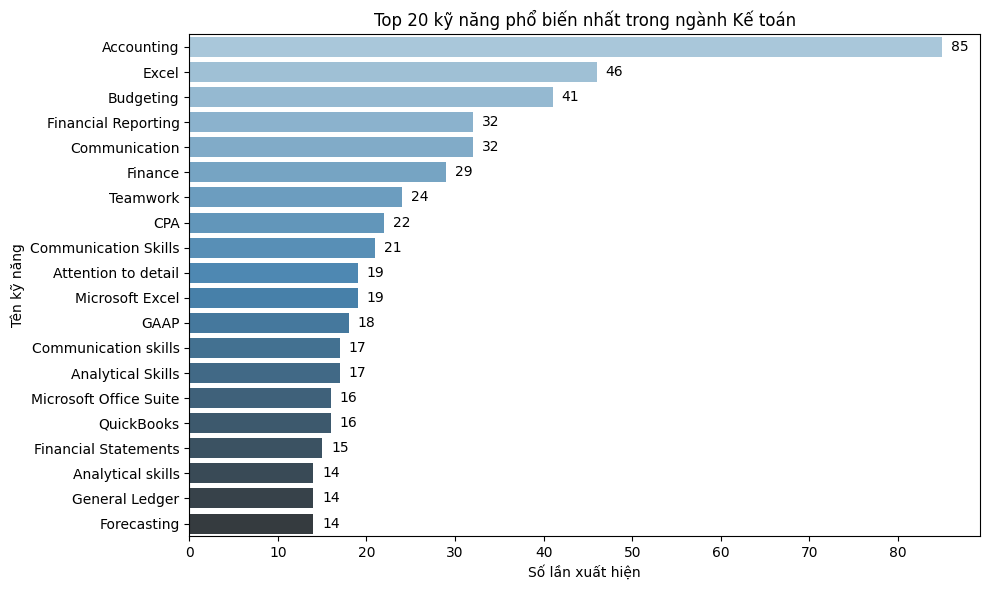

In [ ]:
# Top 20 kỹ năng phổ biến
skill_counter = Counter([skill for skills in df['Job_skill'] for skill in skills])
top_20_skills = skill_counter.most_common(20)
skills, counts = zip(*top_20_skills)

plt.figure(figsize=(10, 6))
bars = sns.barplot(x=list(counts), y=list(skills), palette="Blues_d")
plt.title("Top 20 kỹ năng phổ biến nhất trong ngành Kế toán")
plt.xlabel("Số lần xuất hiện")
plt.ylabel("Tên kỹ năng")
for bar in bars.patches:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center')
plt.tight_layout()
plt.show()

In [ ]:
# Xây dựng mạng kỹ năng
edge_list = []
for skills in df['Job_skill']:
    if len(skills) > 1:
        edge_list.extend(combinations(skills, 2))

G = nx.Graph()
for edge in edge_list:
    if G.has_edge(*edge):
        G[edge[0]][edge[1]]['weight'] += 1
    else:
        G.add_edge(*edge, weight=1)

# Thống kê mạng
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)
avg_degree = sum(dict(G.degree()).values()) / num_nodes

print("\n📊 Thống kê mạng kỹ năng:")
print(f"Số lượng kỹ năng (nodes): {num_nodes}")
print(f"Số cặp kỹ năng (edges): {num_edges}")
print(f"Mật độ mạng (density): {round(density, 4)}")
print(f"Trung bình số liên kết/kỹ năng: {round(avg_degree, 1)}")


📊 Thống kê mạng kỹ năng:
Số lượng kỹ năng (nodes): 1605
Số cặp kỹ năng (edges): 30370
Mật độ mạng (density): 0.0236
Trung bình số liên kết/kỹ năng: 37.8


In [ ]:
# Degree và Betweenness Centrality
deg_cent = nx.degree_centrality(G)
bet_cent = nx.betweenness_centrality(G)

# Xuất top 10
df_deg_cent = pd.DataFrame(deg_cent.items(), columns=['Kỹ năng', 'Degree Centrality']).sort_values(by='Degree Centrality', ascending=False).head(10)
df_bet_cent = pd.DataFrame(bet_cent.items(), columns=['Kỹ năng', 'Betweenness Centrality']).sort_values(by='Betweenness Centrality', ascending=False).head(10)

print("\n🔝 Top 10 Degree Centrality:")
print(df_deg_cent)

print("\n🔝 Top 10 Betweenness Centrality:")
print(df_bet_cent)


🔝 Top 10 Degree Centrality:
                  Kỹ năng  Degree Centrality
0              Accounting           0.579800
39                  Excel           0.379676
7               Budgeting           0.327307
125         Communication           0.299252
20    Financial Reporting           0.275561
1                 Finance           0.271197
124                   CPA           0.258105
126              Teamwork           0.238778
76   Communication Skills           0.202618
64    Attention to detail           0.188903

🔝 Top 10 Betweenness Centrality:
                  Kỹ năng  Betweenness Centrality
0              Accounting                0.226447
39                  Excel                0.088855
7               Budgeting                0.073257
124                   CPA                0.050366
125         Communication                0.048421
20    Financial Reporting                0.046979
64    Attention to detail                0.045011
126              Teamwork                0

Tổng số cụm kỹ năng: 18

🔹 Top 5 kỹ năng tiêu biểu mỗi cụm:


,Cụm,Kỹ năng
0,0,"Accounting, Finance, GAAP, Bank reconciliation..."
1,2,"Accounting principles, Analytical skills, Tran..."
2,3,"IFRS, Tax audits, Revenue forecasting, Monthen..."
3,5,"Budgeting, MS Office Suite, Real Estate Valuat..."
4,10,"Organizational skills, Data analysis, Communic..."


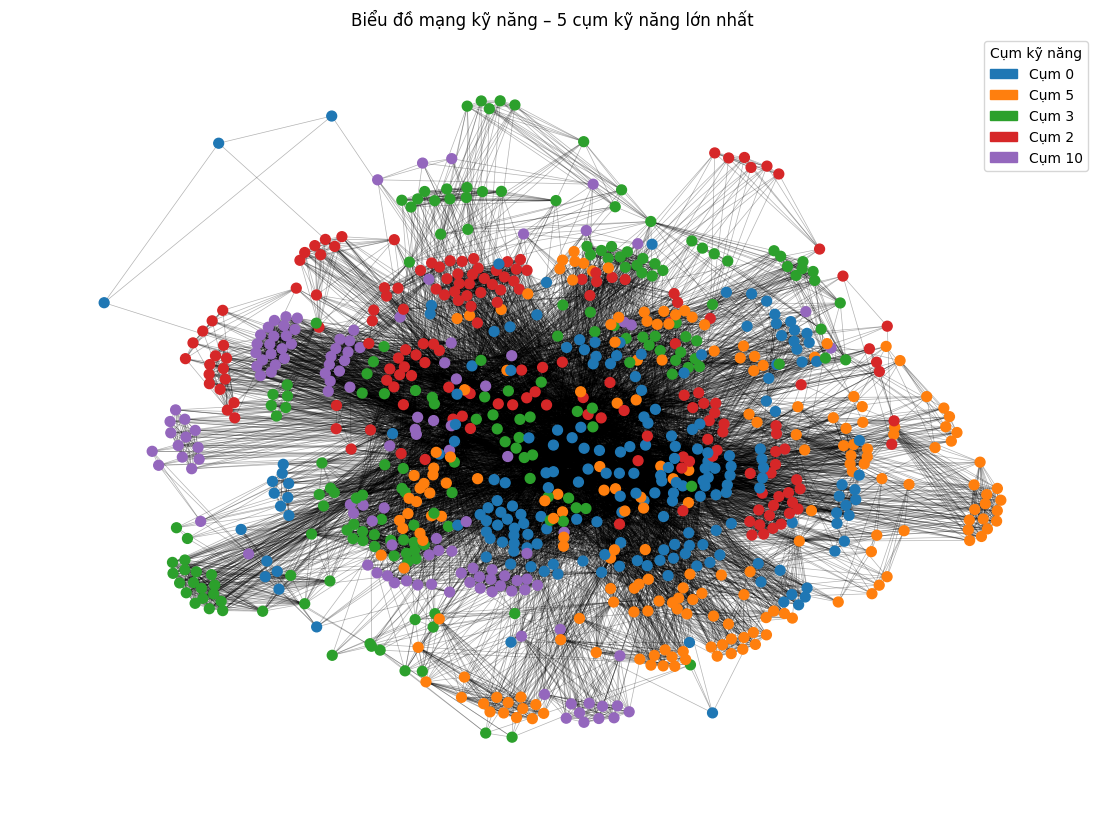

In [ ]:
# Phân cụm và đếm số cụm
import random
random.seed(42)
partition = community_louvain.best_partition(G)
df_cluster = pd.DataFrame(list(partition.items()), columns=['Kỹ năng', 'Cụm'])
total_clusters = df_cluster['Cụm'].nunique()
print(f"Tổng số cụm kỹ năng: {total_clusters}")

# Lấy 5 cụm kỹ năng lớn nhất
top_5_clusters = df_cluster['Cụm'].value_counts().head(5).index.tolist()

# Tóm tắt 10 kỹ năng tiêu biểu trong mỗi cụm (không chỉ 5 như trước)
top_cluster_summary = df_cluster[df_cluster['Cụm'].isin(top_5_clusters)] \
    .groupby('Cụm')['Kỹ năng'] \
    .apply(lambda x: ', '.join(list(x)[:5])) \
    .reset_index()
print("\n🔹 Top 5 kỹ năng tiêu biểu mỗi cụm:")
from IPython.display import display
display(top_cluster_summary)

# Tạo mạng con từ 5 cụm lớn nhất
subgraph_nodes = df_cluster[df_cluster['Cụm'].isin(top_5_clusters)]['Kỹ năng'].tolist()
subgraph = G.subgraph(subgraph_nodes)

# Định nghĩa màu sắc cho từng cụm
color_palette = {
    top_5_clusters[0]: '#1f77b4',  # xanh dương
    top_5_clusters[1]: '#ff7f0e',  # cam
    top_5_clusters[2]: '#2ca02c',  # xanh lá
    top_5_clusters[3]: '#d62728',  # đỏ
    top_5_clusters[4]: '#9467bd'   # tím
}

# Vẽ biểu đồ mạng phân cụm
plt.figure(figsize=(14, 10))
pos = nx.spring_layout(subgraph, k=0.3, seed=42)
node_colors = [color_palette[partition[node]] for node in subgraph.nodes()]

nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors, node_size=50)
nx.draw_networkx_edges(subgraph, pos, alpha=0.3, width=0.5)

# Legend cho 5 cụm
legend_handles = [mpatches.Patch(color=color_palette[i], label=f"Cụm {i}") for i in top_5_clusters]
plt.legend(handles=legend_handles, title="Cụm kỹ năng", loc="best")

plt.title("Biểu đồ mạng kỹ năng – 5 cụm kỹ năng lớn nhất")
plt.axis("off")
plt.show()